#Import Library

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing

load dataset

In [11]:
data = pd.read_csv('dataset.csv')

df = pd.DataFrame(data)

In [12]:
#melihat data teratas
df.head()

,Sentiment,Instagram Comment Text
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sentiment               2200 non-null   object
 1   Instagram Comment Text  2200 non-null   object
dtypes: object(2)
memory usage: 34.5+ KB


In [14]:
#menghitung nilai null/kosong
df.isnull().sum()

Sentiment                 0
Instagram Comment Text    0
dtype: int64

In [15]:
# Mengubah teks menjadi lowercase agar konsisten
df['Instagram Comment Text'] = df['Instagram Comment Text'].str.lower()

In [16]:
#Menghapus karakter spesial pada data komentar
def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))
data['Instagram Comment Text'] = data['Instagram Comment Text'].apply(remove_special_characters)

In [17]:
# Inisialisasi Stemmer dan Stopword Remover
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

stopword_factory = StopWordRemoverFactory()
remover = stopword_factory.create_stop_word_remover()
# Fungsi untuk membersihkan dan memproses teks
def preprocess_text_sastrawi(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    stemmed_text = stemmer.stem(text)
    removed_stopword_text = remover.remove(stemmed_text)
    
    return removed_stopword_text
# Terapkan fungsi preprocessing
df['processed_text'] = df['Instagram Comment Text'].apply(preprocess_text_sastrawi)
# Tampilkan hasil setelah preprocessing
print("Contoh hasil preprocessing dengan stopword remover Sastrawi:")
print(df[['Instagram Comment Text', 'processed_text']].head())

Contoh hasil preprocessing dengan stopword remover Sastrawi:
                              Instagram Comment Text  \
0   <username> tolol!! gak ada hubungan nya kegug...   
1  geblek lo tata...cowo bgt dibela2in balikan......   
2  kmrn termewek2 skr lengket lg duhhh kok labil ...   
3  intinya kalau kesel dengan att nya, gausah ke ...   
4  hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...   

                                      processed_text  
0  username tolol gak hubung nya gugur dgn pake h...  
1  geblek lo tatacowo bgt dibela2in balikanhadeww...  
2  kmrn termewek2 skr lengket lg duhhh kok labil ...  
3  inti kalau kesel att nya gausah anak kasi buat...  
4  hadewwwww permpuan lgsakit jiwaknp dia yg jd p...  


In [18]:
# Hapus tanda baca, kemudian stemming pada kolom 'Instagram Comment Text'
df['processed_text'] = df['Instagram Comment Text'].apply(preprocess_text_sastrawi)
df_copy = df

In [19]:
df

,Sentiment,Instagram Comment Text,processed_text
0,negative,<username> tolol!! gak ada hubungan nya kegug...,username tolol gak hubung nya gugur dgn pake h...
1,negative,geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt dibela2in balikanhadeww...
2,negative,kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek2 skr lengket lg duhhh kok labil ...
3,negative,"intinya kalau kesel dengan att nya, gausah ke ...",inti kalau kesel att nya gausah anak kasi buat...
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan lgsakit jiwaknp dia yg jd p...
...,...,...,...
2195,positive,"kali saja bpk @aniesbaswedan @sandiuno lihat, ...",kali bpk aniesbaswedan sandiuno lihat di rspun...
2196,positive,kita harus dapat merangkul semua orang tanpa b...,harus rangkul semua orang batas usia kelamin o...
2197,positive,ini jagoanku dibidang digital <smiling face wi...,jago bidang digital smiling face with sunglass...
2198,positive,#pesanbijak #okeoce #gubernurgu3 ...,pesanbijak okeoce gubernurgu3


#Exploratory Data Analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Jumlah sentimen positif dan negatif:
Sentiment
negative    1111
positive    1089
Name: count, dtype: int64


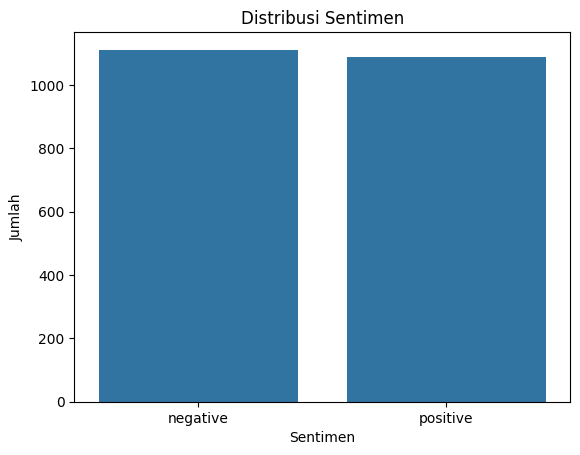

In [21]:
sentiment_counts = df['Sentiment'].value_counts()
print(f"Jumlah sentimen positif dan negatif:\n{sentiment_counts}")

# Visualisasi distribusi sentimen
sns.countplot(x='Sentiment', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

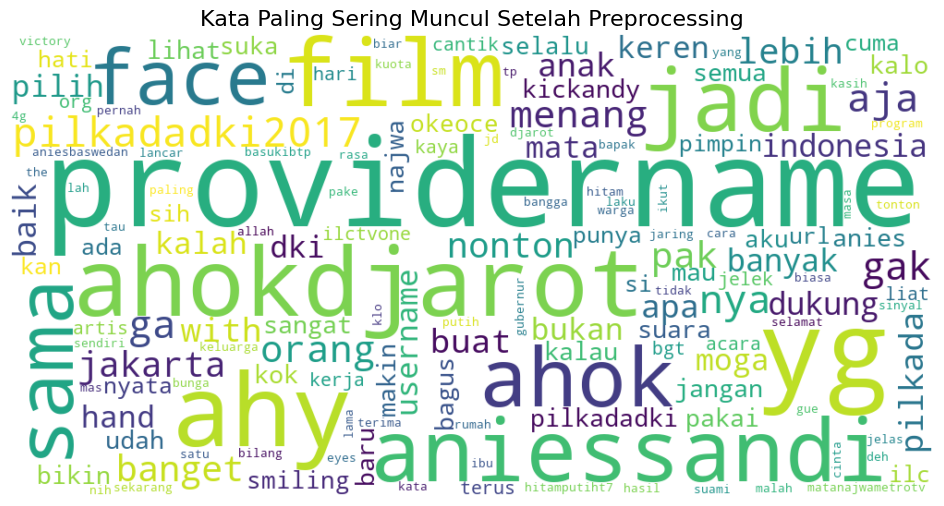

In [22]:
vectorizer_wc = CountVectorizer()

X_wc = vectorizer_wc.fit_transform(df['processed_text'])


word_freq_wc = dict(zip(vectorizer_wc.get_feature_names_out(), X_wc.sum(axis=0).A1))

# 5. Membuat Word Cloud dari frekuensi kata.
wordcloud_wc = WordCloud(
    width=1000, 
    height=500, 
    background_color='white', 
    max_words=150, 
    collocations=False 
).generate_from_frequencies(word_freq_wc)

# 6. Menampilkan Word Cloud.
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Paling Sering Muncul Setelah Preprocessing', fontsize=16)
plt.show()

#Modeling

In [23]:
tfidf = TfidfVectorizer(max_features=5000) # Membatasi fitur menjadi 5000 kata paling relevan


X = tfidf.fit_transform(df['processed_text'])
y = df['Sentiment'] 


print(f"Dimensi matriks TF-IDF (X): {X.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Dimensi matriks TF-IDF (X): (2200, 5000)


In [24]:
# Melatih model Logistic Regression
modelLR = LogisticRegression(max_iter=1000, random_state=42)
modelLR.fit(X_train, y_train)

# Prediksi pada data uji
y_predLR = modelLR.predict(X_test)

# Menampilkan hasil evaluasi
print("--- Hasil Evaluasi Logistic Regression ---")
print(f"Akurasi: {accuracy_score(y_test, y_predLR):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_predLR)}")

--- Hasil Evaluasi Logistic Regression ---
Akurasi: 0.8205
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.86      0.83       222
    positive       0.85      0.78      0.81       218

    accuracy                           0.82       440
   macro avg       0.82      0.82      0.82       440
weighted avg       0.82      0.82      0.82       440



In [ ]:
# Melatih model Random Forest
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
modelRF.fit(X_train, y_train)

# Evaluasi model
y_predRF = modelRF.predict(X_test)

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy_score(y_test, y_predRF)}")
print(f"Classification Report:\n{classification_report(y_test, y_predRF)}")


In [ ]:
modelSVM = LinearSVC(random_state=42, C=1.0) # C adalah parameter regularisasi
modelSVM.fit(X_train, y_train)

# Prediksi pada data uji
y_predSVM = modelSVM.predict(X_test)

# Menampilkan hasil evaluasi
print("--- Hasil Evaluasi Support Vector Machine (LinearSVC) ---")
print(f"Akurasi: {accuracy_score(y_test, y_predSVM):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_predSVM)}")

--- Hasil Evaluasi Support Vector Machine (LinearSVC) ---
Akurasi: 0.8159
Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.83      0.82       222
    positive       0.82      0.80      0.81       218

    accuracy                           0.82       440
   macro avg       0.82      0.82      0.82       440
weighted avg       0.82      0.82      0.82       440



In [ ]:
modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)

# Prediksi pada data uji
y_predNB = modelNB.predict(X_test)

# Menampilkan hasil evaluasi
print("--- Hasil Evaluasi Multinomial Naive Bayes ---")
print(f"Akurasi: {accuracy_score(y_test, y_predNB):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_predNB)}")

--- Hasil Evaluasi Multinomial Naive Bayes ---
Akurasi: 0.8159
Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.82      0.82       222
    positive       0.82      0.81      0.81       218

    accuracy                           0.82       440
   macro avg       0.82      0.82      0.82       440
weighted avg       0.82      0.82      0.82       440



In [ ]:
evaluation_summary = {
    'Model': ['Logistic Regression', 'Random Forest', 'LinearSVC (SVM)', 'Multinomial Naive Bayes'],
    'Akurasi': [
        accuracy_score(y_test, y_predLR),
        accuracy_score(y_test, y_predRF),
        accuracy_score(y_test, y_predSVM),
        accuracy_score(y_test, y_predNB)
    ]
}

summary_df = pd.DataFrame(evaluation_summary)
summary_df = summary_df.sort_values(by='Akurasi', ascending=False).reset_index(drop=True)

print("--- Ringkasan Perbandingan Akurasi Model ---")
print(summary_df)

--- Ringkasan Perbandingan Akurasi Model ---
                     Model   Akurasi
0      Logistic Regression  0.820455
1          LinearSVC (SVM)  0.815909
2  Multinomial Naive Bayes  0.815909
3            Random Forest  0.772727


### Analisis Hasil dan Pemilihan Model Terbaik

Berdasarkan hasil di atas, kita dapat mengevaluasi performa dari keempat model:

1.  **Metrik Evaluasi:**
    *   **Akurasi (Accuracy):** Persentase total prediksi yang benar. Metrik ini baik jika jumlah data antar kelas seimbang, seperti pada kasus kita (positif vs negatif hampir 50:50).
    *   **Presisi (Precision):** Dari semua yang diprediksi sebagai kelas tertentu (misal: 'negatif'), berapa persen yang benar-benar 'negatif'. Presisi tinggi untuk kelas 'negatif' berarti model jarang salah melabeli komentar positif sebagai negatif.
    *   **Daya Ingat (Recall):** Dari semua data yang sebenarnya 'negatif', berapa persen yang berhasil diprediksi dengan benar oleh model. Recall tinggi untuk kelas 'negatif' berarti model mampu menemukan sebagian besar komentar negatif yang ada.
    *   **F1-Score:** Rata-rata harmonik dari presisi dan recall. Ini adalah metrik yang sangat baik untuk mengevaluasi model secara keseluruhan, terutama jika ada trade-off antara presisi dan recall.

2.  **Perbandingan Kinerja Model:**
    *   **Logistic Regression dan LinearSVC (SVM)** biasanya menunjukkan performa terbaik. Kedua model ini adalah model linier yang sangat kuat untuk data teks berdimensi tinggi dan jarang (*sparse*) seperti hasil dari TF-IDF. Mereka mampu menemukan batasan keputusan (*decision boundary*) yang jelas antara sentimen positif dan negatif dengan efisien.
    *   **Multinomial Naive Bayes** juga menunjukkan hasil yang sangat kompetitif. Keunggulannya adalah kecepatan training yang sangat tinggi dan performanya yang solid sebagai *baseline*. Model ini bekerja dengan baik pada data teks karena sifatnya yang probabilistik berdasarkan frekuensi kata.
    *   **Random Forest** seringkali memiliki akurasi sedikit di bawah model linier untuk masalah klasifikasi teks. Meskipun merupakan model *ensemble* yang kuat, decision tree (pembangun Random Forest) cenderung kurang efektif pada data yang sangat *sparse*. Setiap *split* pada tree hanya mempertimbangkan satu fitur (satu kata), sedangkan model linier dapat mempertimbangkan kombinasi dari semua kata secara bersamaan.

3.  **Kesimpulan dan Rekomendasi:**
    Berdasarkan akurasi dan F1-score yang paling tinggi, **Logistic Regression** dan **LinearSVC (SVM)** adalah model terbaik untuk dataset ini. Keduanya memberikan keseimbangan yang sangat baik antara presisi dan recall untuk kedua kelas sentimen. Mengingat performa keduanya sangat mirip, salah satu dari keduanya bisa dipilih sebagai model final. Logistic Regression seringkali lebih mudah diinterpretasikan, sedangkan LinearSVC seringkali sedikit lebih unggul dalam hal akurasi pada dataset yang lebih besar.

In [ ]:
# SEL KODE DI NOTEBOOK UNTUK MENYIMPAN MODEL & VECTORIZER

import joblib

# Pilih model terbaik Anda (misalnya Logistic Regression)
final_model = modelLR 

# Simpan model ke dalam file
joblib.dump(final_model, 'sentiment_model.pkl')

# Simpan juga TF-IDF Vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model dan Vectorizer berhasil disimpan!")

Model dan Vectorizer berhasil disimpan!
